In [79]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

--2021-03-11 16:52:12--  https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv
Resolving data.rivm.nl (data.rivm.nl)... 131.224.250.75, 2001:610:430:ffff::16:198
Connecting to data.rivm.nl (data.rivm.nl)|131.224.250.75|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19_aantallen_gemeente_per_dag.csv’ not modified on server. Omitting download.



In [80]:
import pandas as pd
import numpy  as np
import re

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [81]:
df = pd.read_csv('COVID-19_aantallen_gemeente_per_dag.csv', sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df

Date_of_report Date_of_publication Municipality_code  \
0      2021-03-11 10:00:00          2020-02-27            GM0014   
1      2021-03-11 10:00:00          2020-02-27            GM0034   
2      2021-03-11 10:00:00          2020-02-27            GM0037   
3      2021-03-11 10:00:00          2020-02-27            GM0047   
4      2021-03-11 10:00:00          2020-02-27            GM0050   
...                    ...                 ...               ...   
143257 2021-03-11 10:00:00          2021-03-11               NaN   
143258 2021-03-11 10:00:00          2021-03-11               NaN   
143259 2021-03-11 10:00:00          2021-03-11               NaN   
143260 2021-03-11 10:00:00          2021-03-11               NaN   
143261 2021-03-11 10:00:00          2021-03-11               NaN   

       Municipality_name       Province Security_region_code  \
0              Groningen      Groningen                 VR01   
1                 Almere      Flevoland                 VR25   
2            Stadskanaal      Groningen                 VR01   
3                Veendam      Groningen                 VR01   
4               Zeewolde      Flevoland                 VR25   
...                  ...            ...                  ...   
143257               NaN        Limburg                 VR23   
143258               NaN        Limburg                 VR24   
143259               NaN   Zuid-Holland                 VR15   
143260               NaN        Fryslân                 VR02   
143261               NaN  Noord-Holland                 VR11   

        Security_region_name  Municipal_health_service  \
0                  Groningen             GGD Groningen   
1                  Flevoland             GGD Flevoland   
2                  Groningen             GGD Groningen   
3                  Groningen             GGD Groningen   
4                  Flevoland             GGD Flevoland   
...                      ...                       ...   
143257         Limburg-Noord         GGD Limburg-Noord   
143258          Limburg-Zuid          GGD Zuid-Limburg   
143259            Haaglanden            GGD Haaglanden   
143260               Fryslân               GGD Fryslân   
143261  Zaanstreek-Waterland  GGD Zaanstreek/Waterland   

                              ROAZ_region  Total_reported  Hospital_admission  \
0       Acute Zorgnetwerk Noord Nederland               0                   0   
1                            SpoedZorgNet               0                   0   
2       Acute Zorgnetwerk Noord Nederland               0                   0   
3       Acute Zorgnetwerk Noord Nederland               0                   0   
4                            SpoedZorgNet               0                   0   
...                                   ...             ...                 ...   
143257         Netwerk Acute Zorg Limburg               5                   0   
143258         Netwerk Acute Zorg Limburg               1                   0   
143259            Netwerk Acute Zorg West               5                   0   
143260  Acute Zorgnetwerk Noord Nederland               2                   0   
143261                                NaN               2                   0   

        Deceased  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
143257         0  
143258         0  
143259         0  
143260         0  
143261         0  

[143262 rows x 12 columns]

In [82]:
df.count()

Date_of_report              143262
Date_of_publication         143262
Municipality_code           133787
Municipality_name           133787
Province                    143262
Security_region_code        142883
Security_region_name        142883
Municipal_health_service    143262
ROAZ_region                 140988
Total_reported              143262
Hospital_admission          143262
Deceased                    143262
dtype: int64

In [83]:
daterep = 'Date_of_publication'
region  = 'Municipality_name'
cases   = 'Total_reported'
deaths  = 'Deceased'

lastdate = df[daterep].max() - pd.Timedelta('0 days')

#df[cases]  = 1
#df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df = df.dropna(subset=[region])
df

Date_of_report Date_of_publication Municipality_code  \
0      2021-03-11 10:00:00          2020-02-27            GM0014   
1      2021-03-11 10:00:00          2020-02-27            GM0034   
2      2021-03-11 10:00:00          2020-02-27            GM0037   
3      2021-03-11 10:00:00          2020-02-27            GM0047   
4      2021-03-11 10:00:00          2020-02-27            GM0050   
...                    ...                 ...               ...   
143232 2021-03-11 10:00:00          2021-03-11            GM1966   
143233 2021-03-11 10:00:00          2021-03-11            GM1969   
143234 2021-03-11 10:00:00          2021-03-11            GM1970   
143235 2021-03-11 10:00:00          2021-03-11            GM1978   
143236 2021-03-11 10:00:00          2021-03-11            GM1979   

        Municipality_name      Province Security_region_code  \
0               Groningen     Groningen                 VR01   
1                  Almere     Flevoland                 VR25   
2             Stadskanaal     Groningen                 VR01   
3                 Veendam     Groningen                 VR01   
4                Zeewolde     Flevoland                 VR25   
...                   ...           ...                  ...   
143232       Het Hogeland     Groningen                 VR01   
143233     Westerkwartier     Groningen                 VR01   
143234  Noardeast-Fryslân       Fryslân                 VR02   
143235        Molenlanden  Zuid-Holland                 VR18   
143236          Eemsdelta     Groningen                 VR01   

       Security_region_name       Municipal_health_service  \
0                 Groningen                  GGD Groningen   
1                 Flevoland                  GGD Flevoland   
2                 Groningen                  GGD Groningen   
3                 Groningen                  GGD Groningen   
4                 Flevoland                  GGD Flevoland   
...                     ...                            ...   
143232            Groningen                  GGD Groningen   
143233            Groningen                  GGD Groningen   
143234              Fryslân                    GGD Fryslân   
143235    Zuid-Holland-Zuid  Dienst Gezondheid & Jeugd ZHZ   
143236            Groningen                  GGD Groningen   

                              ROAZ_region  Total_reported  Hospital_admission  \
0       Acute Zorgnetwerk Noord Nederland               0                   0   
1                            SpoedZorgNet               0                   0   
2       Acute Zorgnetwerk Noord Nederland               0                   0   
3       Acute Zorgnetwerk Noord Nederland               0                   0   
4                            SpoedZorgNet               0                   0   
...                                   ...             ...                 ...   
143232  Acute Zorgnetwerk Noord Nederland              14                   0   
143233  Acute Zorgnetwerk Noord Nederland              10                   0   
143234  Acute Zorgnetwerk Noord Nederland              11                   0   
143235   Traumacentrum Zuidwest-Nederland              24                   0   
143236  Acute Zorgnetwerk Noord Nederland               6                   0   

        Deceased  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
143232         0  
143233         0  
143234         0  
143235         0  
143236         0  

[133787 rows x 12 columns]

In [84]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo[cases]

Municipality_name    's-Gravenhage  's-Hertogenbosch  Aa en Hunze  Aalsmeer  \
Date_of_publication                                                           
2020-02-27                       0                 0            0         0   
2020-02-28                       0                 0            0         0   
2020-02-29                       0                 0            0         0   
2020-03-01                       0                 0            0         0   
2020-03-02                       0                 0            0         0   
...                            ...               ...          ...       ...   
2021-03-07                     112                55            6        13   
2021-03-08                      90                37            4         7   
2021-03-09                      87                51            2         9   
2021-03-10                     119                49            2        11   
2021-03-11                     165                56            8        15   

Municipality_name    Aalten  Achtkarspelen  Alblasserdam  Albrandswaard  \
Date_of_publication                                                       
2020-02-27                0              0             0              0   
2020-02-28                0              0             0              0   
2020-02-29                0              0             0              0   
2020-03-01                0              0             0              0   
2020-03-02                0              0             0              0   
...                     ...            ...           ...            ...   
2021-03-07                2             10             5              2   
2021-03-08                8             12            12              5   
2021-03-09                5             12             6              9   
2021-03-10                9             10             6              5   
2021-03-11                5              9             2              8   

Municipality_name    Alkmaar  Almelo  ...  Zeist  Zevenaar  Zoetermeer  \
Date_of_publication                   ...                                
2020-02-27                 0       0  ...      0         0           0   
2020-02-28                 0       0  ...      0         0           0   
2020-02-29                 0       0  ...      0         0           0   
2020-03-01                 0       0  ...      0         0           0   
2020-03-02                 0       0  ...      0         0           0   
...                      ...     ...  ...    ...       ...         ...   
2021-03-07                58      11  ...     11        11          19   
2021-03-08                42      12  ...     10         9          33   
2021-03-09                30       9  ...      9         7          27   
2021-03-10                41      13  ...     22         3          25   
2021-03-11                19      19  ...     16        16          48   

Municipality_name    Zoeterwoude  Zuidplas  Zundert  Zutphen  Zwartewaterland  \
Date_of_publication                                                             
2020-02-27                     0         0        0        0                0   
2020-02-28                     0         0        0        0                0   
2020-02-29                     0         0        0        0                0   
2020-03-01                     0         0        0        0                0   
2020-03-02                     0         0        0        0                0   
...                          ...       ...      ...      ...              ...   
2021-03-07                     1        13        2        5               22   
2021-03-08                     0        10        2        6               14   
2021-03-09                     1         5        4       11               19   
2021-03-10                     0        15        6       19               39   
2021-03-11                     4        13        1       20 

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [85]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                                               \
Municipality_name 's-Gravenhage 's-Hertogenbosch Aa en Hunze Aalsmeer Aalten   
2020-02-27                  0.0              0.0         0.0      0.0    0.0   
2020-02-28                  0.0              0.0         0.0      0.0    0.0   
2020-02-29                  0.0              0.0         0.0      0.0    0.0   
2020-03-01                  0.0              0.0         0.0      0.0    0.0   
2020-03-02                  0.0              0.0         0.0      0.0    0.0   
...                         ...              ...         ...      ...    ...   
2022-03-07                  NaN              NaN         NaN      NaN    NaN   
2022-03-08                  NaN              NaN         NaN      NaN    NaN   
2022-03-09                  NaN              NaN         NaN      NaN    NaN   
2022-03-10                  NaN              NaN         NaN      NaN    NaN   
2022-03-11                  NaN              NaN         NaN      NaN    NaN   

                                                                           \
Municipality_name Achtkarspelen Alblasserdam Albrandswaard Alkmaar Almelo   
2020-02-27                  0.0          0.0           0.0     0.0    0.0   
2020-02-28                  0.0          0.0           0.0     0.0    0.0   
2020-02-29                  0.0          0.0           0.0     0.0    0.0   
2020-03-01                  0.0          0.0           0.0     0.0    0.0   
2020-03-02                  0.0          0.0           0.0     0.0    0.0   
...                         ...          ...           ...     ...    ...   
2022-03-07                  NaN          NaN           NaN     NaN    NaN   
2022-03-08                  NaN          NaN           NaN     NaN    NaN   
2022-03-09                  NaN          NaN           NaN     NaN    NaN   
2022-03-10                  NaN          NaN           NaN     NaN    NaN   
2022-03-11                  NaN          NaN           NaN     NaN    NaN   

                   ... Total_reported                                  \
Municipality_name  ...          Zeist Zevenaar Zoetermeer Zoeterwoude   
2020-02-27         ...            0.0      0.0        0.0         0.0   
2020-02-28         ...            0.0      0.0        0.0         0.0   
2020-02-29         ...            0.0      0.0        0.0         0.0   
2020-03-01         ...            0.0      0.0        0.0         0.0   
2020-03-02         ...            0.0      0.0        0.0         0.0   
...                ...            ...      ...        ...         ...   
2022-03-07         ...            NaN      NaN        NaN         NaN   
2022-03-08         ...            NaN      NaN        NaN         NaN   
2022-03-09         ...            NaN      NaN        NaN         NaN   
2022-03-10         ...            NaN      NaN        NaN         NaN   
2022-03-11         ...            NaN      NaN        NaN         NaN   

                                                                               
Municipality_name Zuidplas Zundert Zutphen Zwartewaterland Zwijndrecht Zwolle  
2020-02-27             0.0     0.0     0.0             0.0         0.0    0.0  
2020-02-28             0.0     0.0     0.0             0.0         0.0    0.0  
2020-02-29             0.0     0.0     0.0             0.0         0.0    0.0  
2020-03-01             0.0     0.0     0.0             0.0         0.0    0.0  
2020-03-02             0.0     0.0     0.0             0.0         0.0    0.0  
...                    ...     ...     ...             ...         ...    ...  
2022-03-07             NaN     NaN     NaN             NaN         NaN    NaN  
2022-03-08             NaN     NaN     NaN             NaN         NaN    NaN  
2022-03-09             NaN     NaN     NaN             NaN         NaN    NaN  
2022-03-10             NaN     NaN     NaN             NaN         NaN    NaN  
2022-03-11             NaN     NaN     NaN             NaN         NaN

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [86]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    744.000000
mean     371.500000
std      214.918589
min        0.000000
25%      185.750000
50%      371.500000
75%      557.250000
max      743.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [87]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [88]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for 'Houten'
Minimum number of cases is 2
Wave 01 beta  9.027 mu  30 fit 0.702 peak 2020-03-28 from 2020-03-17 to 2020-04-18 size 96
Wave 02 beta 13.139 mu 238 fit 0.874 peak 2020-10-22 from 2020-09-28 to 2020-12-22 size 1251
Wave 03 beta 15.992 mu 296 fit 0.719 peak 2020-12-19 from 2020-11-21 to 2021-02-26 size 1184
Wave 04 beta 11.736 mu 339 fit 0.630 peak 2021-01-31 from 2021-01-18 to 2021-02-24 size 99
Wave 05 beta 16.651 mu 370 fit 0.685 peak 2021-03-03 from 2021-02-06 to 2021-04-24 size 376
--- no data for wave


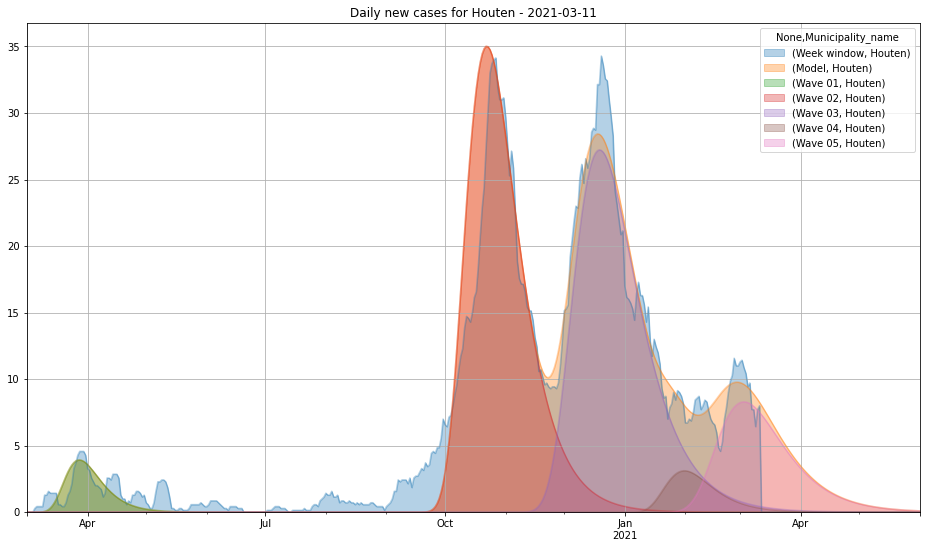

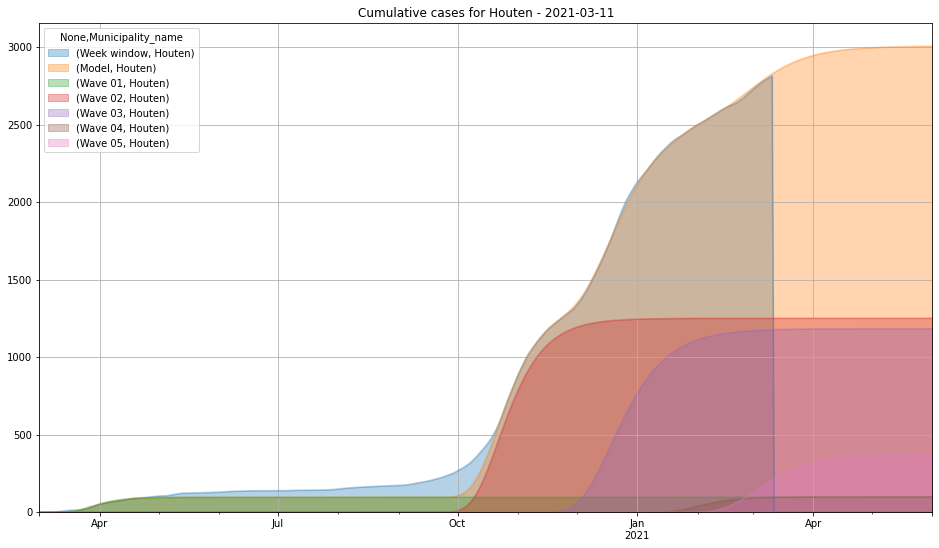

In [89]:
# Select regions to fit.
regions = np.sort(df[region].unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in ['Houten']:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -9/20) &
                          (df_pred['linear'] > -9/2)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -3/90) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        #df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        if ((1 - fincv) ** 2) < 1/2:
            print('--- no significant wave')
            break

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200301':'20210601'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+region+' - '+lastdate.strftime('%Y-%m-%d'))

        df_geo[plotlist].loc['20200301':'20210601'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+region+' - '+lastdate.strftime('%Y-%m-%d'))

In [90]:
#df_geo.reset_index(inplace=True)
df_geo

Deceased                                               \
Municipality_name 's-Gravenhage 's-Hertogenbosch Aa en Hunze Aalsmeer Aalten   
2020-02-27                  0.0              0.0         0.0      0.0    0.0   
2020-02-28                  0.0              0.0         0.0      0.0    0.0   
2020-02-29                  0.0              0.0         0.0      0.0    0.0   
2020-03-01                  0.0              0.0         0.0      0.0    0.0   
2020-03-02                  0.0              0.0         0.0      0.0    0.0   
...                         ...              ...         ...      ...    ...   
2022-03-07                  NaN              NaN         NaN      NaN    NaN   
2022-03-08                  NaN              NaN         NaN      NaN    NaN   
2022-03-09                  NaN              NaN         NaN      NaN    NaN   
2022-03-10                  NaN              NaN         NaN      NaN    NaN   
2022-03-11                  NaN              NaN         NaN      NaN    NaN   

                                                                           \
Municipality_name Achtkarspelen Alblasserdam Albrandswaard Alkmaar Almelo   
2020-02-27                  0.0          0.0           0.0     0.0    0.0   
2020-02-28                  0.0          0.0           0.0     0.0    0.0   
2020-02-29                  0.0          0.0           0.0     0.0    0.0   
2020-03-01                  0.0          0.0           0.0     0.0    0.0   
2020-03-02                  0.0          0.0           0.0     0.0    0.0   
...                         ...          ...           ...     ...    ...   
2022-03-07                  NaN          NaN           NaN     NaN    NaN   
2022-03-08                  NaN          NaN           NaN     NaN    NaN   
2022-03-09                  NaN          NaN           NaN     NaN    NaN   
2022-03-10                  NaN          NaN           NaN     NaN    NaN   
2022-03-11                  NaN          NaN           NaN     NaN    NaN   

                   ... daynum         Model Week window rcases       Wave 01  \
Municipality_name  ...               Houten      Houten Houten        Houten   
2020-02-27         ...      0  5.085508e-10         NaN    NaN  5.085508e-10   
2020-02-28         ...      1  7.778647e-09         NaN    NaN  7.778647e-09   
2020-02-29         ...      2  8.835059e-08         NaN    NaN  8.835059e-08   
2020-03-01         ...      3  7.687866e-07         NaN    NaN  7.687866e-07   
2020-03-02         ...      4  5.270197e-06         NaN    NaN  5.270197e-06   
...                ...    ...           ...         ...    ...           ...   
2022-03-07         ...    739  5.402605e-09         NaN    NaN  8.075952e-34   
2022-03-08         ...    740  5.087532e-09         NaN    NaN  7.229072e-34   
2022-03-09         ...    741  4.790834e-09         NaN    NaN  6.471000e-34   
2022-03-10         ...    742  4.511439e-09         NaN    NaN  5.792423e-34   
2022-03-11         ...    743  4.248339e-09         NaN    NaN  5.185004e-34   

                        Wave 02       Wave 03       Wave 04       Wave 05  \
Municipality_name        Houten        Houten        Houten        Houten   
2020-02-27         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2020-02-28         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2020-02-29         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2020-03-01         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2020-03-02         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                         ...           ...           ...           ...   
2022-03-07         2.691206e-15  6.928284e-11  1.394480e-14  5.333305e-09   
2022-03-08         2.493981e-15  6.508319e-11  1.280581e-14  5.022433e-09   
2022-03-09         2.311210e-15  6.113810e-11  1.175986e-14  4.729682e-09   
2022-03-10         2.141833e-15  5.743215e-11  1.079934e-14  4.453994e-09   
2022-03-11     

In [91]:
df_out = df_geo.melt(id_vars=['index'], value_vars=[pmeasure])
df_out = df_geo.melt(value_vars=[pmeasure])
pmeasure
#df_out.columns = (['date', 'type', 'location', 'value'])
#df_out.to_csv('zzcorgem.csv')

KeyError: "The following 'id_vars' are not present in the DataFrame: ['index']"

Keep exploring! Stay home, wash your hands, keep your distance.